image stats (37, 500, 500) uint16 201 275
psf stats (65, 256, 256) float32 1.0101339e-12 1.0 30.42964


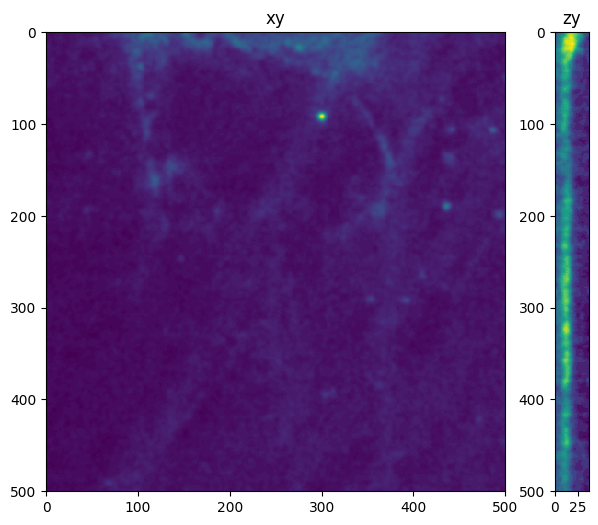

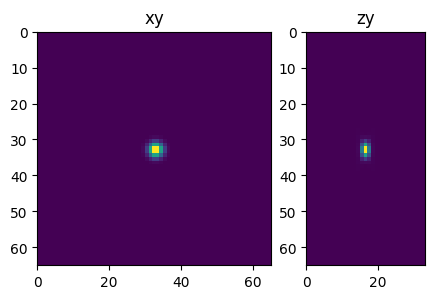

In [35]:
from tnia.plotting.projections import show_xy_zy_slice_center
from tnia.nd.ndutil import centercrop
from pathlib import Path
from skimage.io import imread

parent_path = r"D:\images\tnia-python-images\imagesc\2025_05_19_tnia_deconvolution"
image = imread(Path(parent_path) / "C1-introns_g_downsized.tif")
psf = imread(Path(parent_path) / "PSF_488_rw.tif")

print('image stats', image.shape, image.dtype, image.min(), image.max())
print('psf stats', psf.shape, psf.dtype, psf.min(), psf.max(), psf.sum())

image = image-image.min()
image = image.astype('float32')

psf = psf/psf.sum()
#psf = psf[22:42,:,:]
psf = centercrop(psf, [33, 65, 65])

fig = show_xy_zy_slice_center(image, figsize=(7,7))
fig = show_xy_zy_slice_center(psf, figsize=(5,5))

Total GPU memory = 23.9993896484375
Available GPU memory = 17.696613311767578
At beginning, used = 0.06919527053833008
After image, used = 0.1530303955078125
After psf, used = 0.23686552047729492
After HTones, used = 0.32070064544677734
using flat sheet
new version!

0 10 20 30 40 50 60 70 80 90 
get lib
calling convcorr 0 0
get lib
calling convcorr 0 0
get lib
calling convcorr 0 0
Split time: 0.00569 s.
Convolution time: 0.00206 s.
KLD time: 0.02095 s.
H^T ratio time: 0.00116 s.
Update time: 0.00032 s.
Iteration 001 completed in 0.031 s. KLDs = 0.1212 (image), 0.4470 (split 1), 0.4474 (split 2). Update range: 0.29 to 7.27. Largest relative delta = 0.86239.

Split time: 0.00756 s.
Convolution time: 0.00056 s.
KLD time: 0.01811 s.
H^T ratio time: 0.00125 s.
Update time: 0.00028 s.
Iteration 002 completed in 0.028 s. KLDs = 0.0064 (image), 0.2254 (split 1), 0.2257 (split 2). Update range: 0.58 to 1.51. Largest relative delta = 0.33979.

Split time: 0.00750 s.
Convolution time: 0.00054 s.

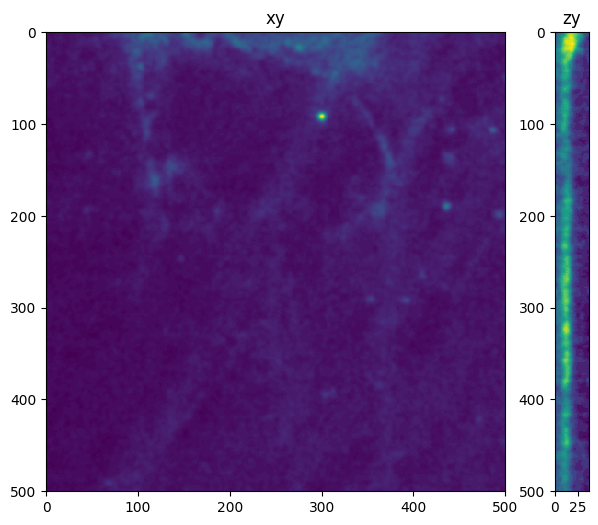

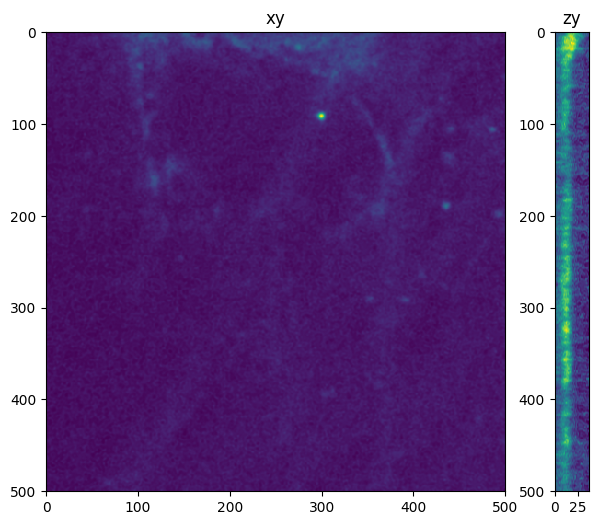

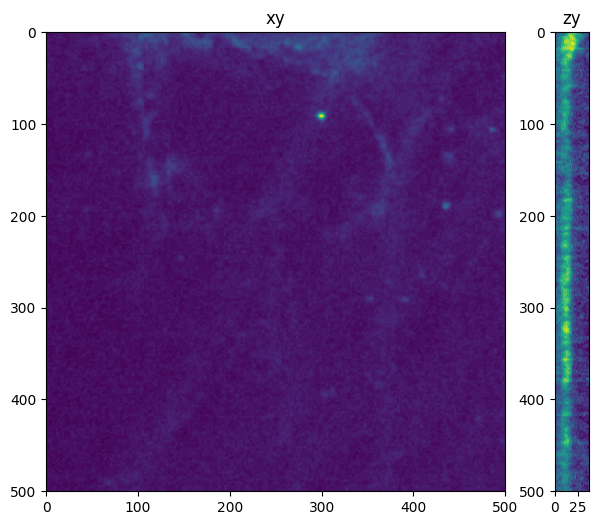

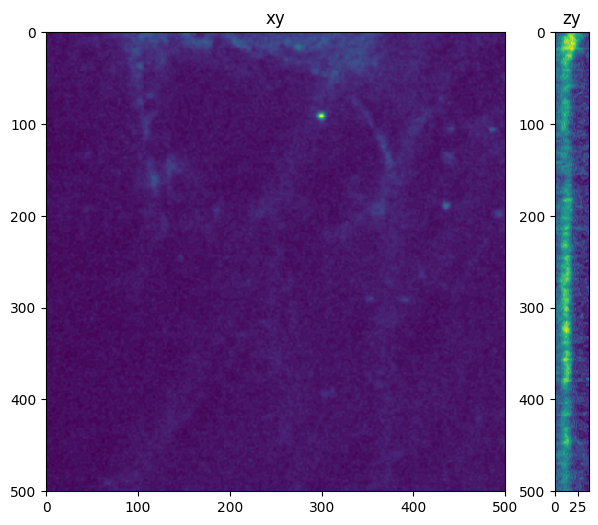

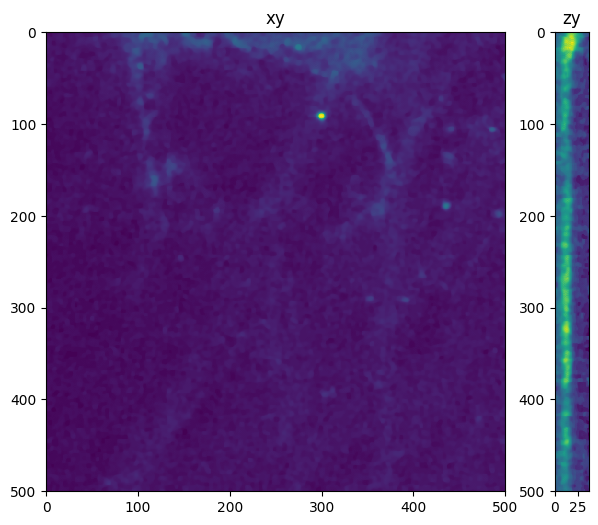

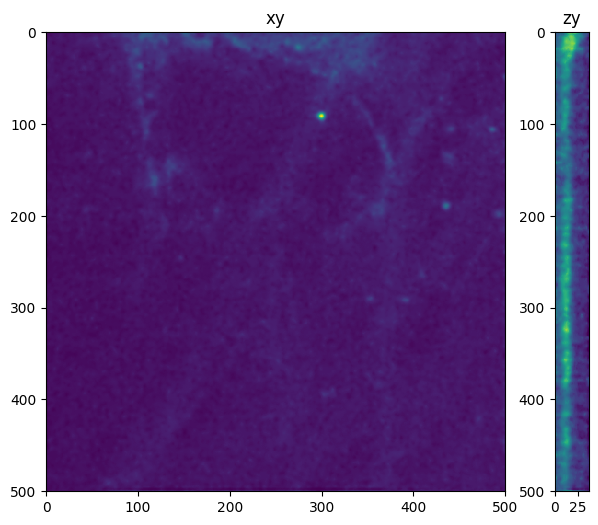

In [47]:
from tnia.deconvolution.richardson_lucy import richardson_lucy_cp
from tnia.deconvolution.richardson_lucy_gradient_consensus_latest import rlgc_latest
from clij2fft.richardson_lucy import richardson_lucy_nc

decon = richardson_lucy_cp(image, psf, 100, noncirc=True)
decon_clij2 = richardson_lucy_nc(image, psf, 100)
decon_clij2_tv0001 = richardson_lucy_nc(image, psf, 100, 0.0001)
decon_clij2_tv001 = richardson_lucy_nc(image, psf, 100, 0.01)
decon_rlgc_latest = rlgc_latest(image, psf, 100)
fig = show_xy_zy_slice_center(image, figsize=(7,7))
fig = show_xy_zy_slice_center(decon, figsize=(7,7))
fig = show_xy_zy_slice_center(decon_clij2, figsize=(7,7))
fig = show_xy_zy_slice_center(decon_clij2_tv0001, figsize=(7,7))
fig = show_xy_zy_slice_center(decon_clij2_tv001, figsize=(7,7))
fig = show_xy_zy_slice_center(decon_rlgc_latest, figsize=(7,7))

In [48]:
import napari

viewer = napari.Viewer()
viewer.add_image(image, name='image')
viewer.add_image(decon, name='decon')
viewer.add_image(decon_clij2, name='decon_clij2')
viewer.add_image(decon_clij2_tv0001, name='decon_clij2_tv0001')
viewer.add_image(decon_clij2_tv001, name='decon_clij2_tv001')
viewer.add_image(decon_rlgc_latest, name='decon_rlgc_latest')

<Image layer 'decon_rlgc_latest' at 0x1c5c7d0a950>